In [221]:
import pandas as pd 
import re
import os 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [230]:
df=pd.read_csv("main_data.csv")
df.dropna(inplace=True)

In [231]:
df.isnull().sum()

EmailText    0
Label        0
dtype: int64

In [232]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd

# Assuming 'EmailText' contains the text data and 'Label' contains the labels
X = df['EmailText']
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 10000  # Vocabulary size
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences so they are all the same length
maxlen = 200  # Maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

# Convert the labels to categorical (for binary classification using softmax)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Build the model
model = Sequential()

# Embedding layer: input_dim is the vocabulary size, and input_shape is the shape of the padded sequences
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_shape=(maxlen,)))

# Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64)))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add a Dense layer with softmax activation for binary classification
model.add(Dense(2, activation='softmax'))  # 2 classes: ham and spam

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary to verify that all layers are properly built
model.summary()

# Train the model
batch_size = 64
epochs = 10
history = model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))


c:\Users\bhara\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_19                │ (None, 128)            │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,379,074 (5.26 MB)

 Trainable params: 1,379,074 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.8275 - loss: 0.3931 - val_accuracy: 0.9738 - val_loss: 0.0884
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9806 - loss: 0.0688 - val_accuracy: 0.9866 - val_loss: 0.0450
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9896 - loss: 0.0372 - val_accuracy: 0.9893 - val_loss: 0.0442
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9933 - loss: 0.0254 - val_accuracy: 0.9936 - val_loss: 0.0270
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9882 - loss: 0.0357 - val_accuracy: 0.8913 - val_loss: 0.2079
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9679 - loss: 0.0810 - val_accuracy: 0.9861 - val_loss: 0.0453
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9938 - loss: 0.0227 - val_accuracy: 0.9893 - val_loss: 0.0443
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9973 - loss: 0.0146 - val_acc

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9907 - loss: 0.0412
Test Accuracy: 98.93%


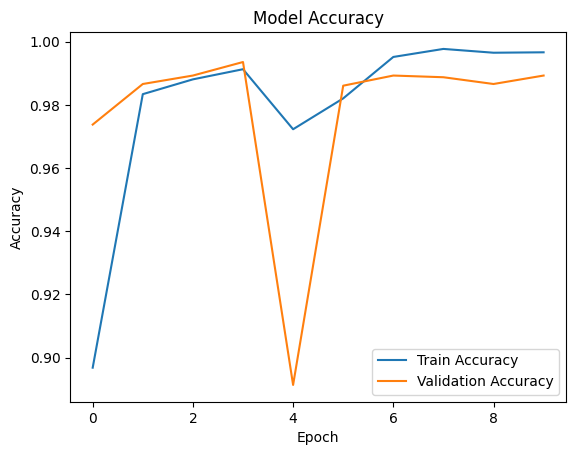

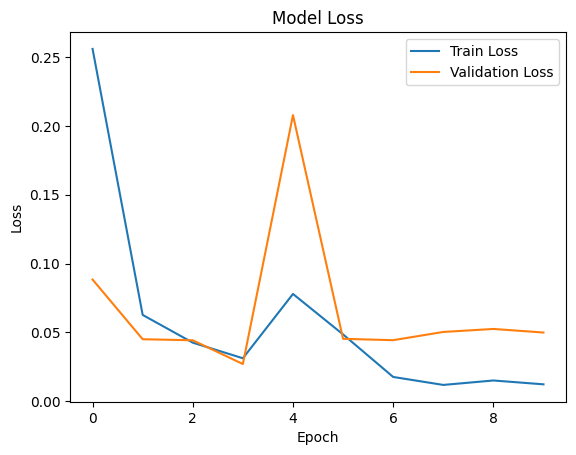

In [233]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# If you want to plot accuracy and loss over epochs
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [234]:
import numpy as np

# Sample email to predict
new_emails = ["""
From: covidrelief@fakefund.com
To: hospitaladmin@hospitalcare.com
Subject: Urgent: COVID-19 Relief Fund Available – Apply Now

Dear Hospital Administrator,

We are pleased to inform you that your hospital has been selected to receive a $50,000 COVID-19 relief fund. To claim this amount, you must fill out the application form by clicking the link below:

[Click here to apply for the COVID-19 relief fund](http://fakereleiffund.com)

The funds are limited and will be distributed on a first-come, first-served basis. Please provide your hospital's banking details and tax ID to expedite the process.

Regards,  
COVID Relief Team  
(555) 888-9999


"""]

# Tokenize and pad the email sequences
new_sequences = tokenizer.texts_to_sequences(new_emails)
new_padded = pad_sequences(new_sequences, maxlen=maxlen, padding='post', truncating='post')

# Predict the probabilities of each class (ham=0, spam=1)
predictions = model.predict(new_padded)

# Print the predicted probabilities for each class
print("Predicted probabilities:", predictions)

# Set a custom threshold for classifying spam
spam_threshold = 0.95 # You can adjust this threshold

# Get the probability of the email being classified as spam (class 1)
spam_probabilities = predictions[:, 1]  # Probability of spam (class 1)

# Apply the threshold: if spam probability > threshold, classify as spam (1), else ham (0)
predicted_labels = (spam_probabilities > spam_threshold).astype(int)

# Output the predicted labels
print("Predicted labels based on threshold:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Predicted probabilities: [[8.7405776e-04 9.9912590e-01]]
Predicted labels based on threshold: [1]


In [235]:
jpp=df['EmailText'].head(1)
jpp

0    mv bfcddbffccadb mv ffbcebefcdceaaa mv cdcbcfa...
Name: EmailText, dtype: object

In [236]:
df

,EmailText,Label
0,mv bfcddbffccadb mv ffbcebefcdceaaa mv cdcbcfa...,1
1,from email tue aug by phoboslabsnetnoteinccom ...,1
2,tr save up to on life insurance why spend more...,1
3,the need for safety is real in you might only ...,1
4,from email thu aug by phoboslabsspamassassinta...,1
...,...,...
9344,from email thu oct by jmasonorg postfix with e...,0
9345,from email thu oct by jmasonorg postfix with e...,0
9346,from email thu oct by jmasonorg postfix with e...,0
9347,from email thu oct by jmasonorg postfix with e...,0


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy Score: 0.9893


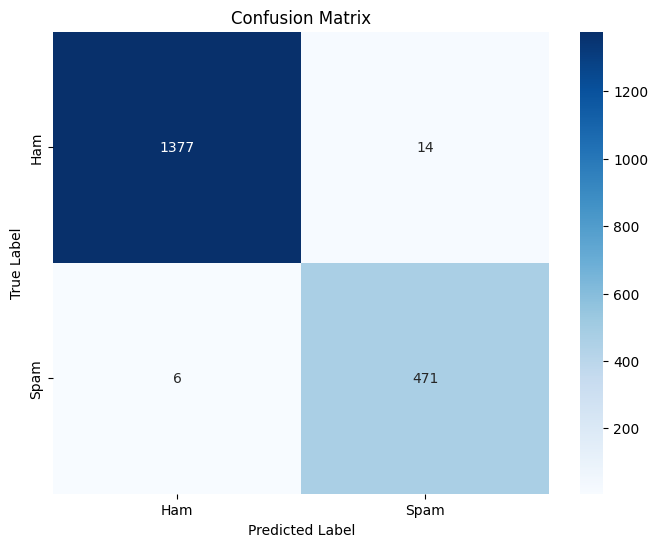

In [237]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the probabilities for the test data
y_pred_prob = model.predict(X_test_pad)

# Convert predicted probabilities to binary class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Since y_test is categorical, we need to convert it back to class labels
y_test_class = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred)

# Calculate accuracy score
acc_score = accuracy_score(y_test_class, y_pred)
print(f"Accuracy Score: {acc_score:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Confusion Matrix Breakdown:
True Positives (TP): 471
These are the emails correctly predicted as Spam.
True Negatives (TN): 1377
These are the emails correctly predicted as Ham (non-spam).
False Positives (FP): 6
These are the emails incorrectly predicted as Spam, but they are actually Ham (non-spam).
False Negatives (FN): 14
These are the emails incorrectly predicted as Ham, but they are actually Spam.